## **Exploratory data analysis** ⚛

In this section I will cover exploratory data analysis techniques.

In [ ]:
# Importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings as wr 
wr.filterwarnings('ignore') 

# Loading the dataset
file_path = r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\dropped_rows_columns.csv'
cleaned = pd.read_csv(file_path)

After importing necessary libraries and cleaned .csv file from the previous part, we can now start with basic data exploration and later on go into details.

In [ ]:
# Basic information about the dataset
print("Data info:")
print(cleaned.info())

# Basic statistics of the dataset
print("\nBasic statistics:")
print(cleaned.describe(include='all'))

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 40 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ID                                                           59 non-null     int64  
 1   Godzina rozpoczęcia                                          59 non-null     object 
 2   Godzina ukończenia                                           59 non-null     object 
 3   Adres e-mail                                                 59 non-null     object 
 4   W jaki sposób chcesz uczestniczyć w Community?               59 non-null     object 
 5   Programming: R                                               59 non-null     float64
 6   Programming: Python                                          59 non-null     float64
 7   Programming: Bash                                            59 non-nul

Checking for missing values:

In [ ]:
# Checking for missing values
missing_values = cleaned.isnull().sum()
print("\nMissing values:")
print(missing_values[missing_values > 0])


Missing values:
Series([], dtype: int64)


Empty series - no missing values as shown above.

I will clear some leftover columns from the dataset that I won't use.

In [ ]:
# Reloads the latest dataset
data = pd.read_csv(r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\cleaned_dataset.csv')

# Dropping columns that contain 'Godzina' or 'Adres' in their names and other specified columns
columns_to_drop = [col for col in data.columns if 'Godzina' in col or 'Adres' in col] + ['Nazwa', 'Czas ostatniej modyfikacji']
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')

# Saving the cleaned dataset to a CSV file
cleaned_file_path = r'D:\Users\Desktop\ProjektAnalitiks\data\02_Interim\cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

From categorical data we can extract the type of preferred activity in community.

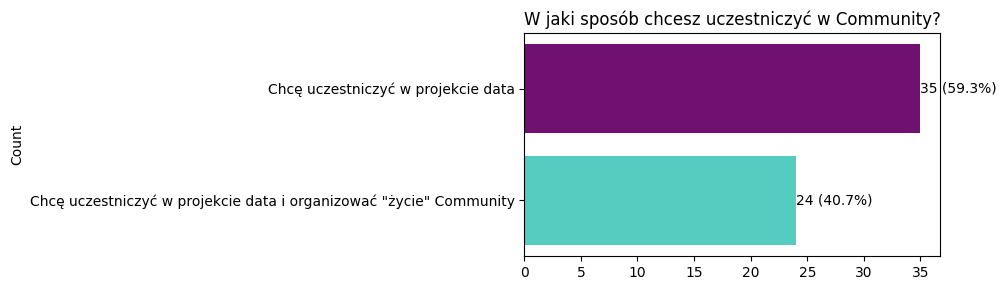

In [ ]:
# Plotting the count plot for the categorical column with count and percentages
plt.figure(figsize=(10, 3))
ax = sns.countplot(y=cleaned["W jaki sposób chcesz uczestniczyć w Community?"], order=cleaned["W jaki sposób chcesz uczestniczyć w Community?"].value_counts().index, palette=["purple", "turquoise"])
plt.title("W jaki sposób chcesz uczestniczyć w Community?", fontsize=12)
plt.xlabel('')
plt.ylabel('Count', fontsize=10)

# Adding count and percentage labels
total = len(cleaned["W jaki sposób chcesz uczestniczyć w Community?"])
for p in ax.patches:
    count = int(p.get_width())
    percentage = f'{100 * p.get_width() / total:.1f}%'
    label = f'{count} ({percentage})'
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(label, (x, y), ha='left', va='center')

plt.tight_layout()
plt.show()


From the graph above we can conclude that almost **60%** of respondents are only interested in participation in data project, and the rest (**~40%**) desires to both participate in data project and organize community life. We are taking into consideration only those respondents that want to be active members of this community, filtering out 8 respondents who declared passive membership.

### **Distribution analysis** 📊

After last cleaning procedure I will create box-plots and histograms to visualize distribution among different column values.

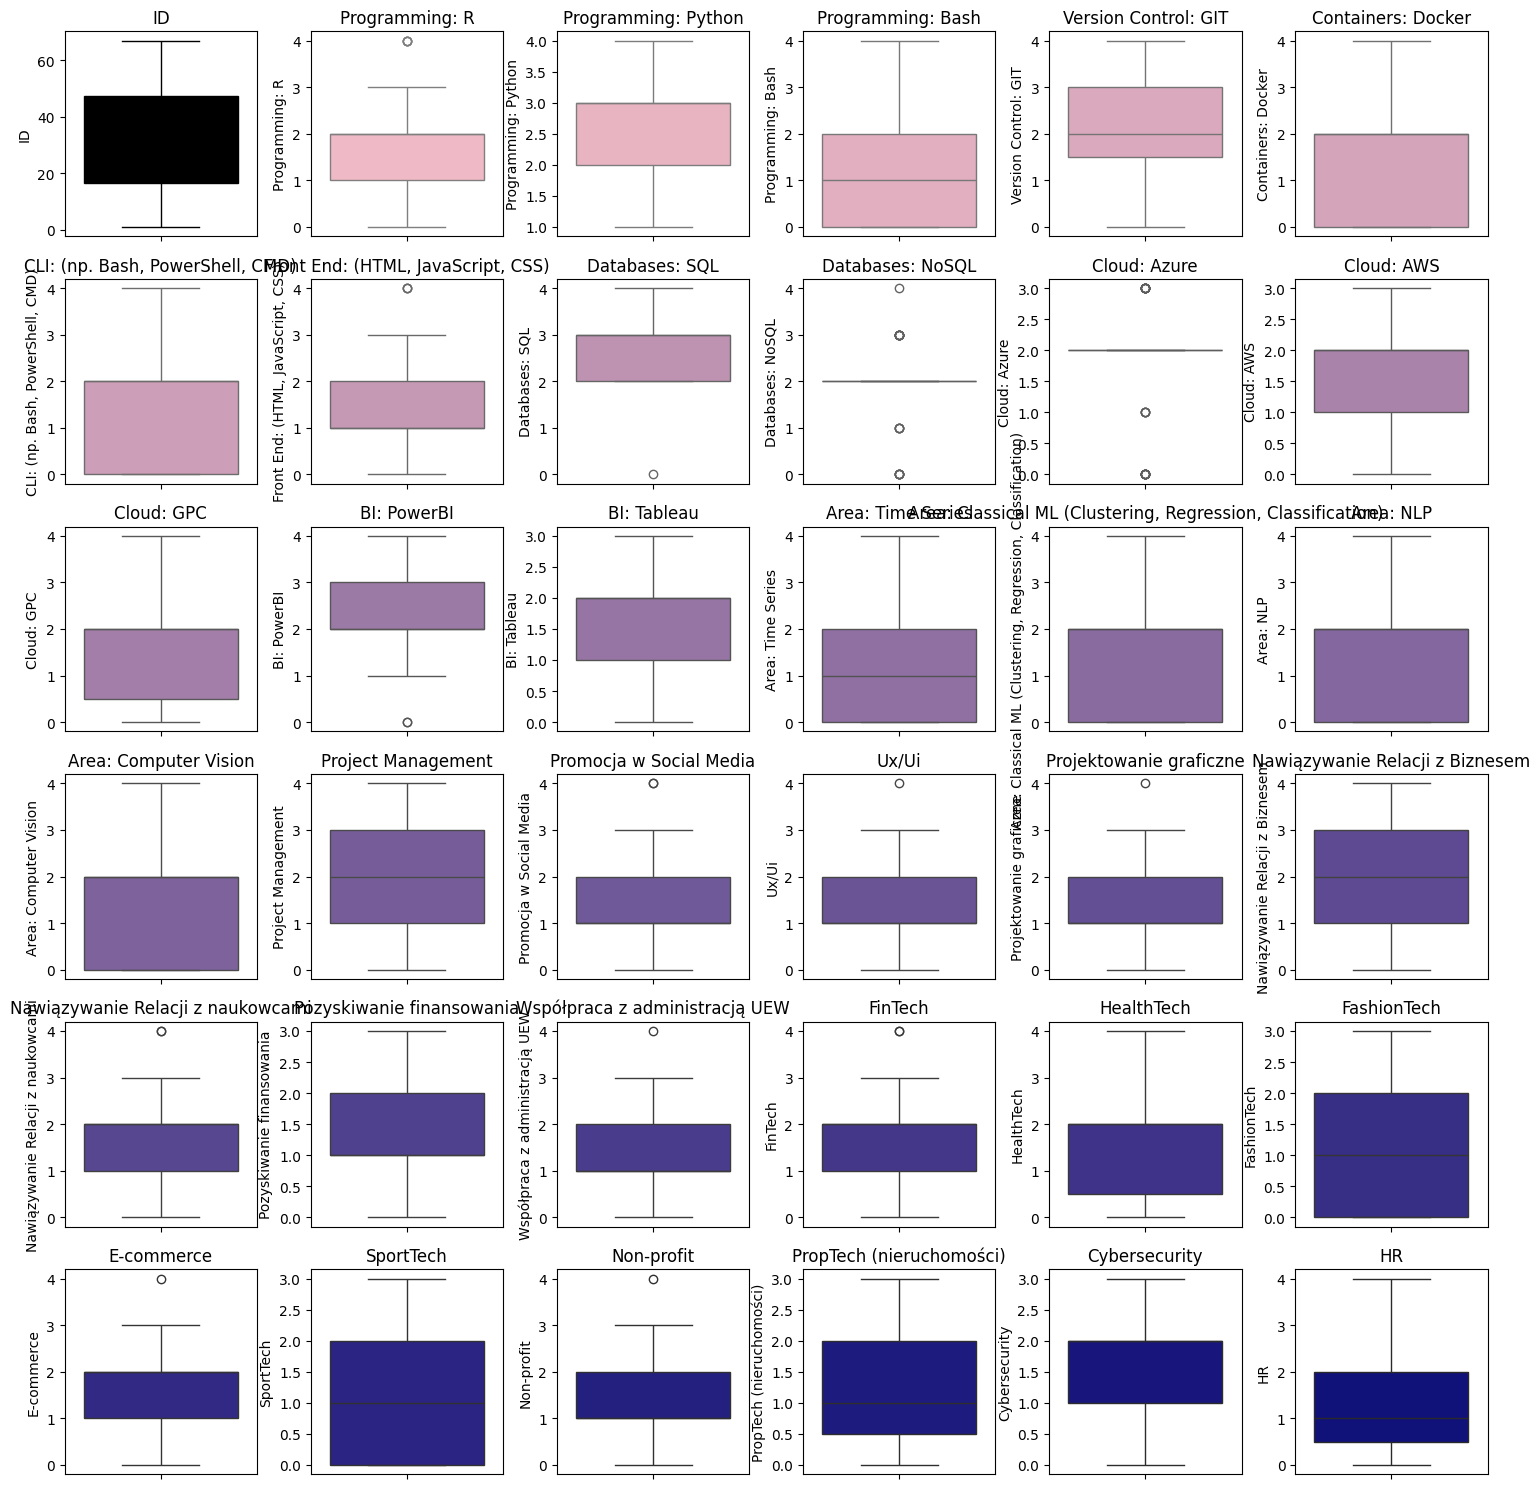

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import math

# Generates gradient colors
def gradient_colors(start_color, end_color, n_colors):
    cmap = LinearSegmentedColormap.from_list('custom_gradient', [start_color, end_color], N=n_colors)
    return [cmap(i / (n_colors - 1)) for i in range(n_colors)]

# Identifying numerical columns again after column removal
numerical_columns = cleaned.select_dtypes(include=['float64', 'int64']).columns

# Contrasting gradient from pale pink to vivid blue
num_columns = len(numerical_columns)
gradient_colors_list = gradient_colors('#FFB6C1', '#00008B', num_columns)

# Assigning gradient colors to num columns
colors = {col: gradient_colors_list[i] for i, col in enumerate(numerical_columns)}

# Including 'ID' with the color black
colors['ID'] = 'black'

# Setting the number of rows and columns for the main grid
num_rows = 6
num_cols = 6

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten axes array
axes = axes.flatten()

# Generating box plots with colors
for i, column in enumerate(numerical_columns):
    color = colors.get(column, 'steelblue')  # Default color if column not in colors
    sns.boxplot(y=cleaned[column].dropna(), ax=axes[i], color=color)  # Drops NA values for plotting
    axes[i].set_title(column)

# Removing any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout
plt.tight_layout()
plt.show()


##### According to the set of boxplots above I can see that there is a strong represantation of people with high Python and SQL skills, covered with Project Management interests and some Git version control knowledge. Dispersion for Python is a bit more diffused, which means that differenced in skills are more differentiated in case of Python.

##### To confirm these assumptions I will now generate combo plots (histogram plots with line trends) for each column containing numerical values and split them by categories with colours.

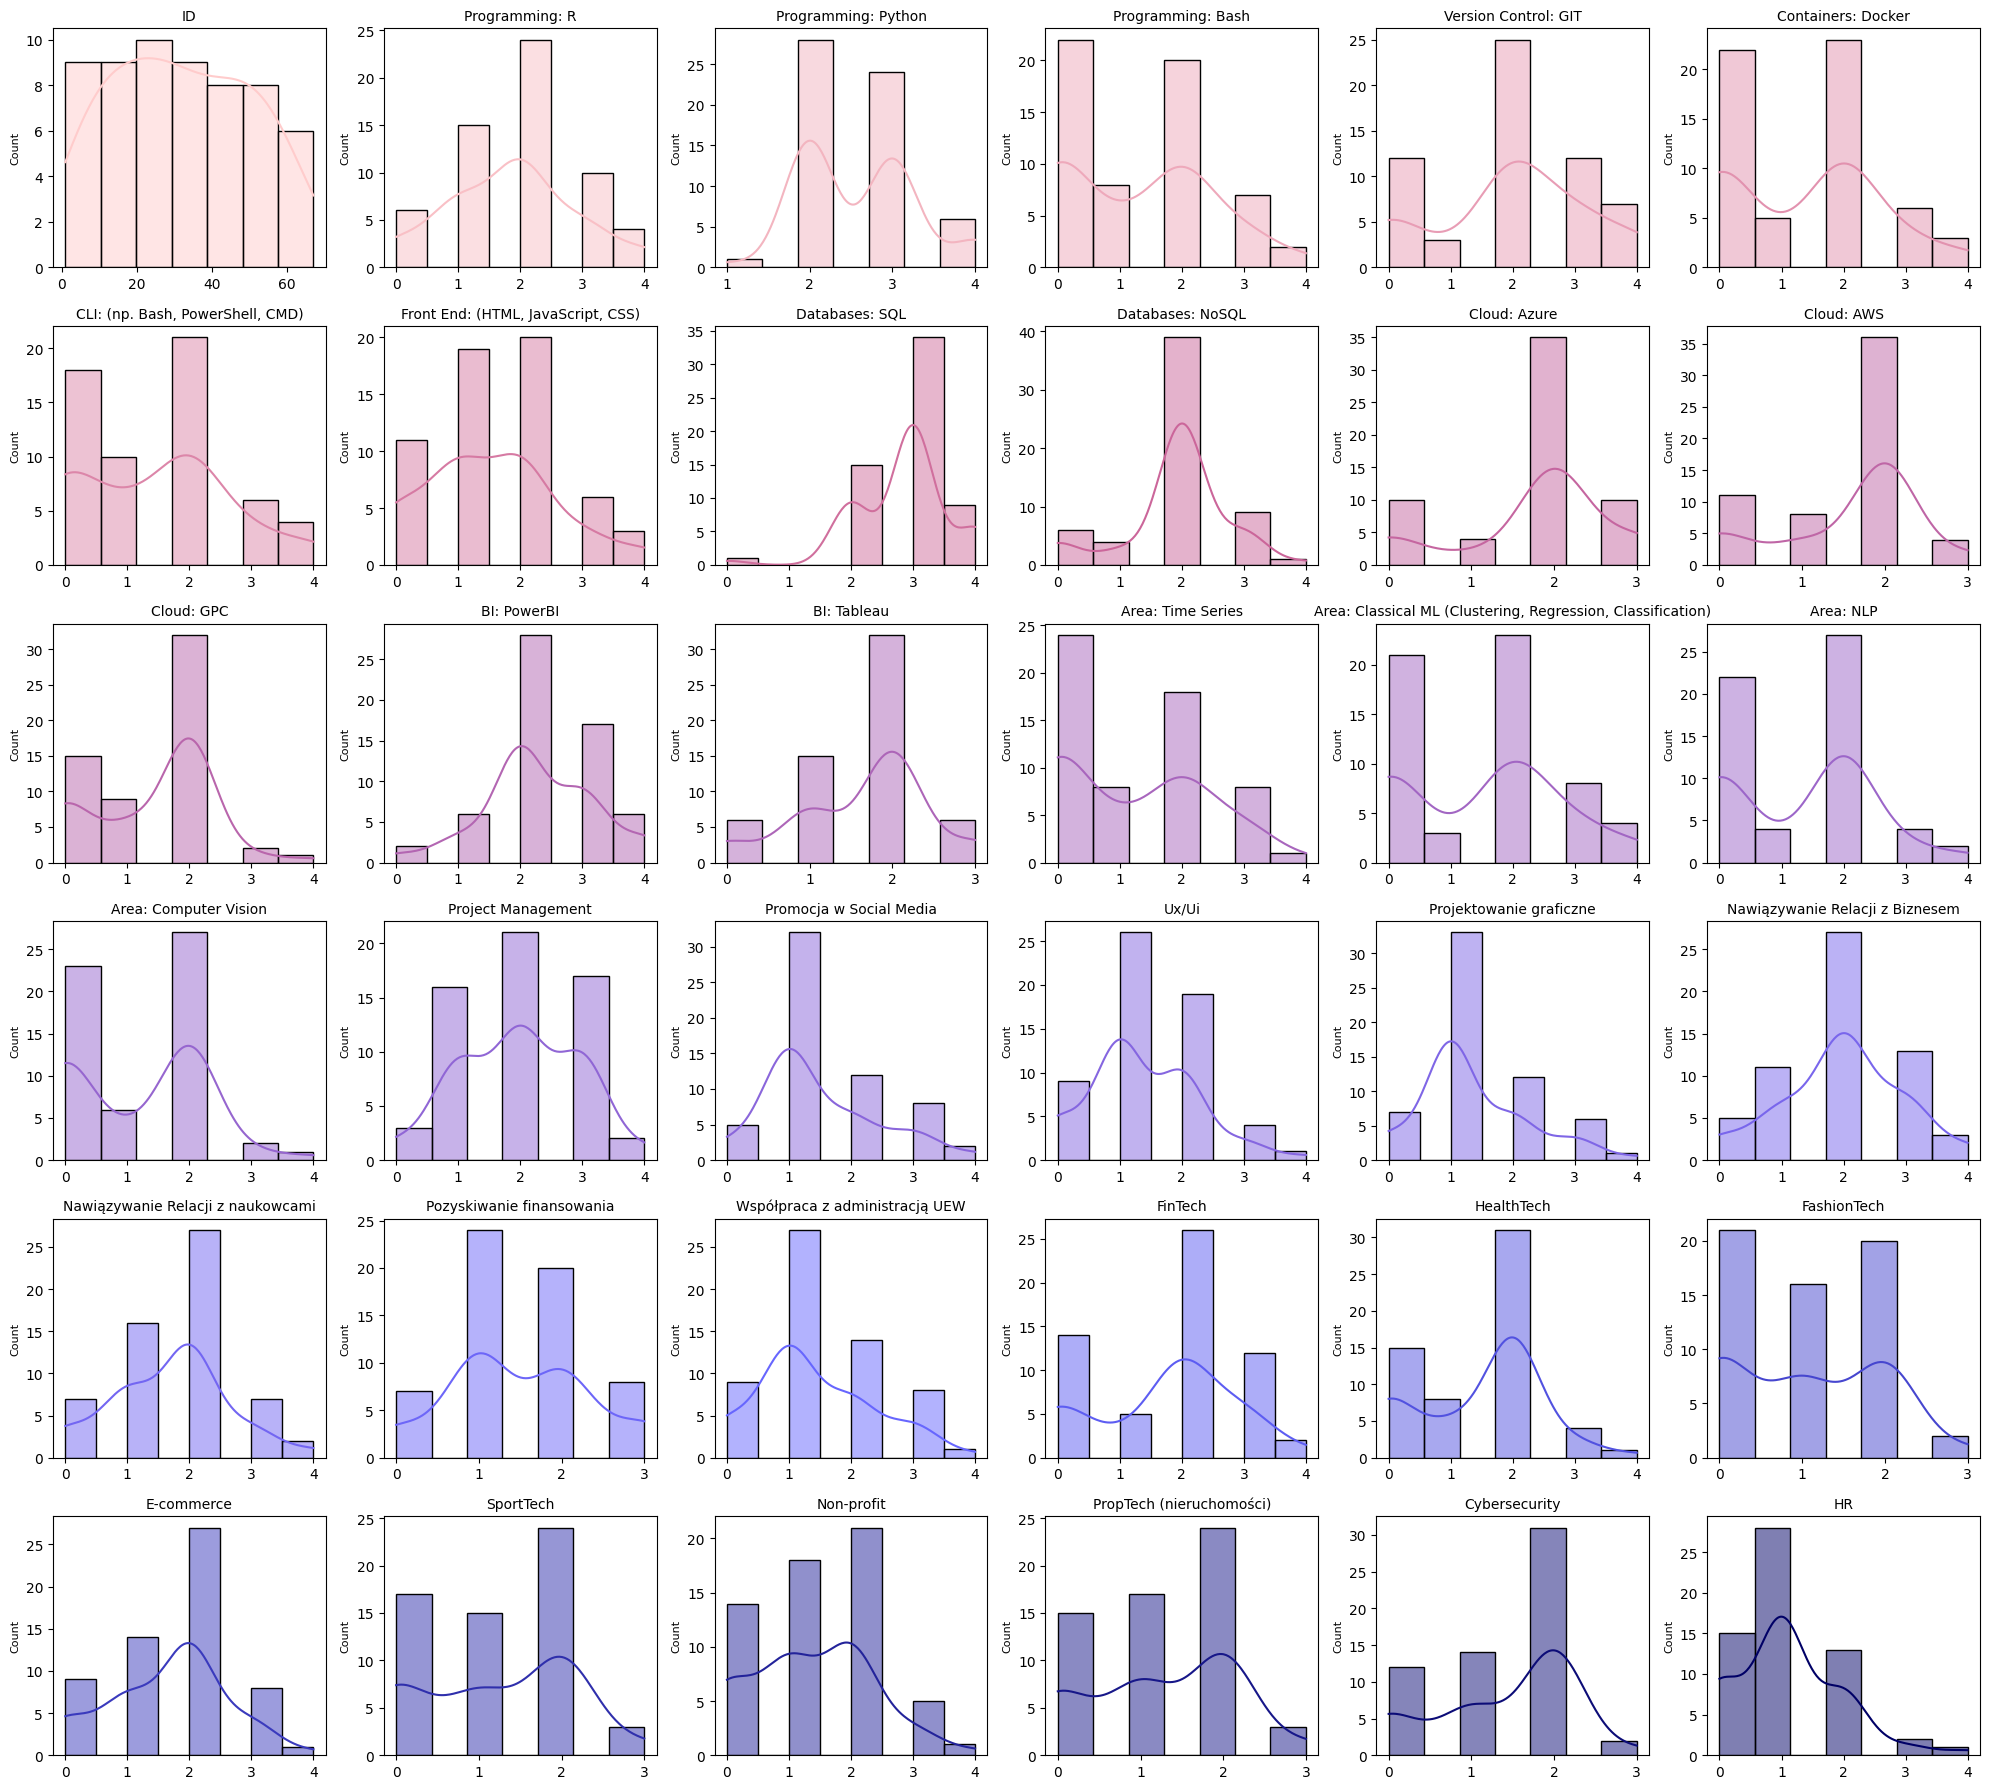

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Generate a gradient color map
colors = ['#FFCCCC', '#CC6699', '#9966CC', '#6666FF', '#000066']
n_bins = len(numerical_columns)  # Number of bins for the gradient
cmap_name = 'custom_gradient'
gradient_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Getting colors
gradient_colors = [gradient_cmap(i) for i in range(n_bins)]

# Mapping from columns to gradient colors
column_colors = dict(zip(numerical_columns, gradient_colors))

# Identifying numerical columns
numerical_columns = cleaned.select_dtypes(include=['float64', 'int64']).columns

# Number of plots
num_plots = len(numerical_columns)

# Calculating the number of rows needed
num_cols = 6
num_rows = (num_plots + num_cols - 1) // num_cols

# Plotting histograms for numerical variables and grouping by skill types with gradient colors
plt.figure(figsize=(20, num_rows * 3))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    color = column_colors.get(col, 'indigo')  # Default color for ungrouped columns
    sns.histplot(cleaned[col], kde=True, color=color)
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=8)

plt.tight_layout()
plt.show()


##### **Conclusion**: After generating histograms with line graph for each column, it is more visible that respondents are the most proficient in **SQL databases**. 
##### The least proficiency is observed in **HR** teritory, in **social media promotion** and **creating visuals**.